In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Data

In [3]:
df = pd.read_csv('gym dataset path')

In [4]:
df.head()

,number_people,date,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,37,2015-08-14 17:00:11-07:00,61211,4,0,0,71.76,0,0,8,17
1,45,2015-08-14 17:20:14-07:00,62414,4,0,0,71.76,0,0,8,17
2,40,2015-08-14 17:30:15-07:00,63015,4,0,0,71.76,0,0,8,17
3,44,2015-08-14 17:40:16-07:00,63616,4,0,0,71.76,0,0,8,17
4,45,2015-08-14 17:50:17-07:00,64217,4,0,0,71.76,0,0,8,17


In [5]:
df.shape

(62184, 11)

In [6]:
df.columns

Index(['number_people', 'date', 'timestamp', 'day_of_week', 'is_weekend',
       'is_holiday', 'temperature', 'is_start_of_semester',
       'is_during_semester', 'month', 'hour'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62184 entries, 0 to 62183
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   number_people         62184 non-null  int64  
 1   date                  62184 non-null  object 
 2   timestamp             62184 non-null  int64  
 3   day_of_week           62184 non-null  int64  
 4   is_weekend            62184 non-null  int64  
 5   is_holiday            62184 non-null  int64  
 6   temperature           62184 non-null  float64
 7   is_start_of_semester  62184 non-null  int64  
 8   is_during_semester    62184 non-null  int64  
 9   month                 62184 non-null  int64  
 10  hour                  62184 non-null  int64  
dtypes: float64(1), int64(9), object(1)
memory usage: 5.2+ MB


In [8]:
df.isnull().sum()

,0
number_people,0
date,0
timestamp,0
day_of_week,0
is_weekend,0
is_holiday,0
temperature,0
is_start_of_semester,0
is_during_semester,0
month,0


In [9]:
df.duplicated().sum()

np.int64(0)

##DateTime

In [10]:
df['date'] = pd.to_datetime(df['date'], utc = True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62184 entries, 0 to 62183
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   number_people         62184 non-null  int64              
 1   date                  62184 non-null  datetime64[ns, UTC]
 2   timestamp             62184 non-null  int64              
 3   day_of_week           62184 non-null  int64              
 4   is_weekend            62184 non-null  int64              
 5   is_holiday            62184 non-null  int64              
 6   temperature           62184 non-null  float64            
 7   is_start_of_semester  62184 non-null  int64              
 8   is_during_semester    62184 non-null  int64              
 9   month                 62184 non-null  int64              
 10  hour                  62184 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(1), int64(9)
memory usage: 5.2 M

In [12]:
df['date']

,date
0,2015-08-15 00:00:11+00:00
1,2015-08-15 00:20:14+00:00
2,2015-08-15 00:30:15+00:00
3,2015-08-15 00:40:16+00:00
4,2015-08-15 00:50:17+00:00
...,...
62179,2017-03-19 01:42:28+00:00
62180,2017-03-19 01:52:35+00:00
62181,2017-03-19 02:02:40+00:00
62182,2017-03-19 02:12:47+00:00


In [13]:
df['year'] = df['date'].dt.year
#df['month'] = df['date'].dt.month
#df['day'] = df['date'].dt.day
#df['hour'] = df['date'].dt.hour

In [14]:
df['year'].unique()

array([2015, 2016, 2017], dtype=int32)

In [15]:
df.drop('date', axis = 1, inplace = True)

In [16]:
df.head()

,number_people,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour,year
0,37,61211,4,0,0,71.76,0,0,8,17,2015
1,45,62414,4,0,0,71.76,0,0,8,17,2015
2,40,63015,4,0,0,71.76,0,0,8,17,2015
3,44,63616,4,0,0,71.76,0,0,8,17,2015
4,45,64217,4,0,0,71.76,0,0,8,17,2015


#EDA

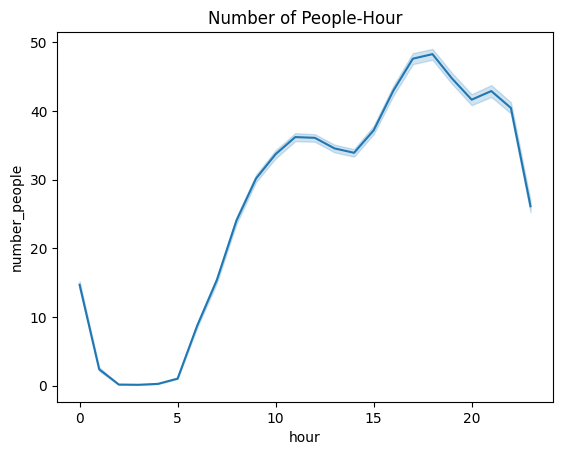

In [17]:
sns.lineplot(x="hour", y="number_people", data=df, estimator="mean")
plt.title("Number of People-Hour")
plt.show()

<Axes: xlabel='day_of_week', ylabel='number_people'>

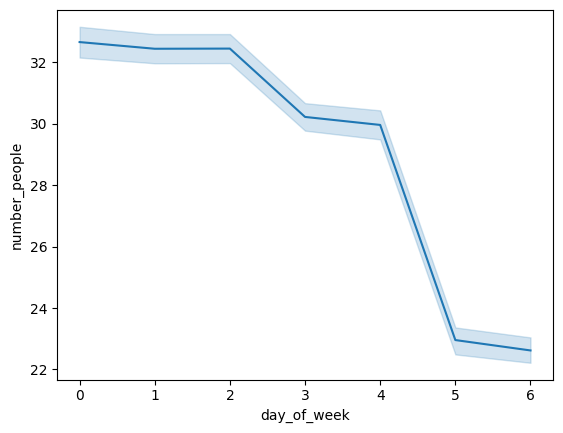

In [18]:
sns.lineplot(x="day_of_week", y="number_people", data=df, estimator="mean")

<Axes: xlabel='is_weekend', ylabel='number_people'>

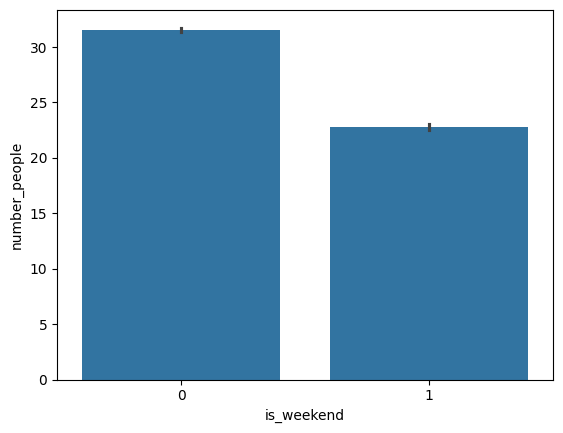

In [19]:
sns.barplot(x="is_weekend", y="number_people", data=df)

<Axes: xlabel='temperature', ylabel='number_people'>

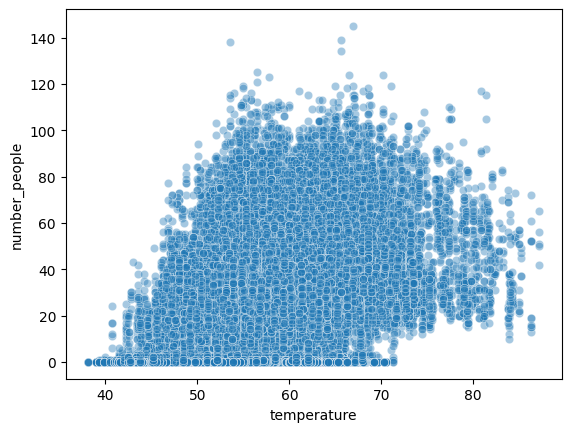

In [20]:
sns.scatterplot(x="temperature", y="number_people", data=df, alpha=0.4)

<Axes: xlabel='temperature', ylabel='number_people'>

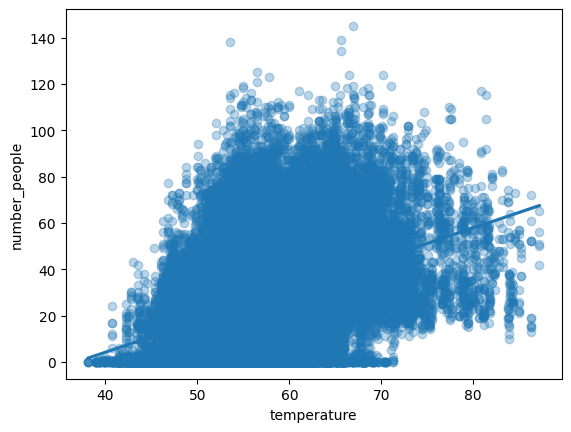

In [21]:
sns.regplot(x="temperature", y="number_people", data=df, scatter_kws={"alpha":0.3})

<Axes: >

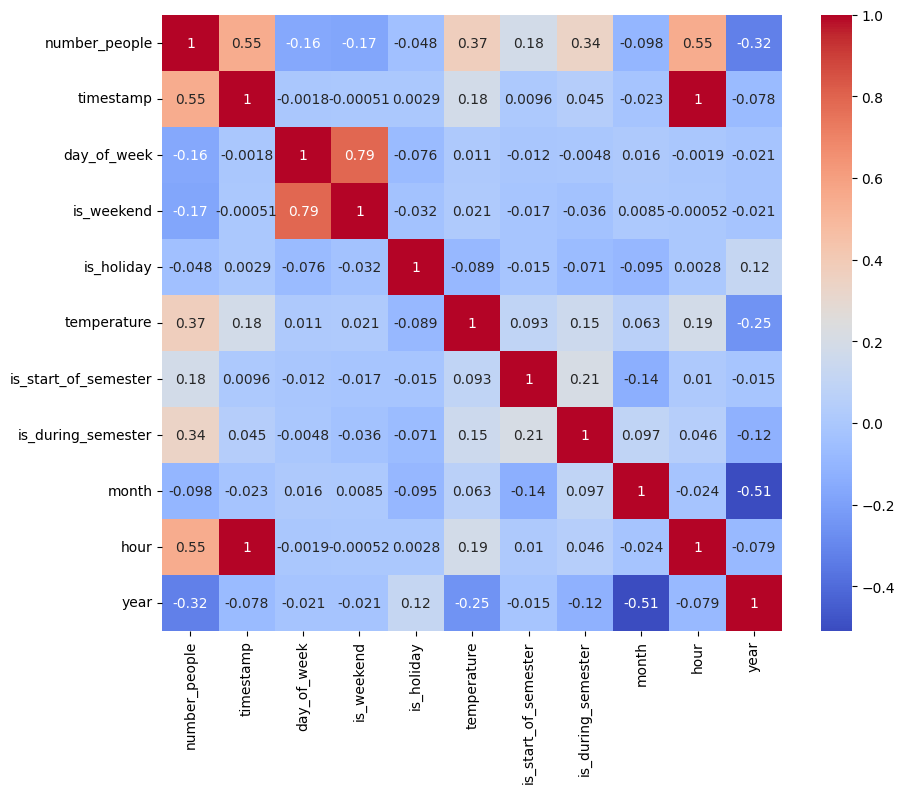

In [22]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")

In [23]:
df.corr()

,number_people,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour,year
number_people,1.000000,0.550218,-0.162062,-0.173958,-0.048249,0.373327,0.182683,0.335350,-0.097854,0.552049,-0.322591
timestamp,0.550218,1.000000,-0.001793,-0.000509,0.002851,0.184849,0.009551,0.044676,-0.023221,0.999077,-0.077767
day_of_week,-0.162062,-0.001793,1.000000,0.791338,-0.075862,0.011169,-0.011782,-0.004824,0.015559,-0.001914,-0.021242
is_weekend,-0.173958,-0.000509,0.791338,1.000000,-0.031899,0.020673,-0.016646,-0.036127,0.008462,-0.000517,-0.021260
is_holiday,-0.048249,0.002851,-0.075862,-0.031899,1.000000,-0.088527,-0.014858,-0.070798,-0.094942,0.002843,0.121129
temperature,0.373327,0.184849,0.011169,0.020673,-0.088527,1.000000,0.093242,0.152476,0.063125,0.185121,-0.249638
is_start_of_semester,0.182683,0.009551,-0.011782,-0.016646,-0.014858,0.093242,1.000000,0.209862,-0.137160,0.010091,-0.015377
is_during_semester,0.335350,0.044676,-0.004824,-0.036127,-0.070798,0.152476,0.209862,1.000000,0.096556,0.045581,-0.124302
month,-0.097854,-0.023221,0.015559,0.008462,-0.094942,0.063125,-0.137160,0.096556,1.000000,-0.023624,-0.508552
hour,0.552049,0.999077,-0.001914,-0.000517,0.002843,0.185121,0.010091,0.045581,-0.023624,1.000000,-0.078816


In [24]:
df.drop('timestamp', axis = 1, inplace = True)

In [25]:
df.head()

,number_people,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour,year
0,37,4,0,0,71.76,0,0,8,17,2015
1,45,4,0,0,71.76,0,0,8,17,2015
2,40,4,0,0,71.76,0,0,8,17,2015
3,44,4,0,0,71.76,0,0,8,17,2015
4,45,4,0,0,71.76,0,0,8,17,2015


#Model

In [26]:
X = df.drop('number_people', axis = 1)
y = df['number_people']

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 15)

In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [29]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [30]:
def calculate_model_metrics(true, predicted):
  mae = mean_absolute_error(true, predicted)
  mse = mean_squared_error(true, predicted)
  rmse = np.sqrt(mean_squared_error(true, predicted))
  r2_square = r2_score(true, predicted)
  return mae, rmse, r2_square

In [31]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor()
}

In [32]:
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    model_train_mae, model_train_rmse, model_train_r2 = calculate_model_metrics(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = calculate_model_metrics(y_test, y_test_pred)

    print(list(models.values())[i])

    print("Evaluation for Training Set")
    print("RMSE :", model_train_rmse)
    print("Mean Absolute Error :", model_train_mae)
    print("R2 Score :", model_train_r2)

    print("-----------------------------")

    print("Evaluation for Test Set")
    print("RMSE :", model_test_rmse)
    print("Mean Absolute Error :", model_test_mae)
    print("R2 Score :", model_test_r2)

    print("-----------------------------")
    print("\n")

LinearRegression()
Evaluation for Training Set
RMSE : 14.322500408269727
Mean Absolute Error : 10.733469936454322
R2 Score : 0.5999639521710998
-----------------------------
Evaluation for Test Set
RMSE : 14.45063290337055
Mean Absolute Error : 10.779752371029558
R2 Score : 0.5989271376662775
-----------------------------


Lasso()
Evaluation for Training Set
RMSE : 14.569122351126817
Mean Absolute Error : 10.945189874221992
R2 Score : 0.5860687429058037
-----------------------------
Evaluation for Test Set
RMSE : 14.703511215751082
Mean Absolute Error : 10.970594902476911
R2 Score : 0.5847671974050243
-----------------------------


Ridge()
Evaluation for Training Set
RMSE : 14.322500413912243
Mean Absolute Error : 10.733479178820698
R2 Score : 0.5999639518559021
-----------------------------
Evaluation for Test Set
RMSE : 14.450633329986024
Mean Absolute Error : 10.779759559023008
R2 Score : 0.5989271139851151
-----------------------------


KNeighborsRegressor()
Evaluation for Train

##Hyperparameter Tuning

In [33]:
knn_params = {"n_neighbors": [2,3,10,20,40,50]}
rf_params = {
    "max_depth" : [5,8,10,15,None],
    "max_features" : ["sqrt", "log2",5,7,10],
    "n_estimators" : [10,50,100,200,500,1000],
    "min_samples_split" : [2,8,12,20]
}

In [34]:
from sklearn.model_selection import RandomizedSearchCV

In [35]:
randomcv_models = [
    ("KNN",KNeighborsRegressor(), knn_params),
    ("Random Forest", RandomForestRegressor(), rf_params)
]

In [37]:
for name, model, params in randomcv_models:
  randomcv = RandomizedSearchCV(model, params, n_iter = 100, cv =3, n_jobs = -1)
  randomcv.fit(X_train, y_train)
  print("best params for:", name, randomcv.best_params_)

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 6 is smaller than n_iter=100. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


best params for: KNN {'n_neighbors': 2}


/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


best params for: Random Forest {'n_estimators': 1000, 'min_samples_split': 2, 'max_features': 5, 'max_depth': None}


In [39]:
#best params for: KNN {'n_neighbors': 2}
#best params for: Random Forest {'n_estimators': 1000, 'min_samples_split': 2, 'max_features': 5, 'max_depth': None}

In [40]:
models = {
    "K-Neighbors Regressor": KNeighborsRegressor(n_neighbors = 2),
    "Random Forest Regressor": RandomForestRegressor(n_estimators = 500,
                                                     min_samples_split = 2,
                                                     max_features = 7,
                                                     max_depth = None)
}

In [41]:
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    model_train_mae, model_train_rmse, model_train_r2 = calculate_model_metrics(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = calculate_model_metrics(y_test, y_test_pred)

    print(list(models.values())[i])

    print("Evaluation for Training Set")
    print("RMSE :", model_train_rmse)
    print("Mean Absolute Error :", model_train_mae)
    print("R2 Score :", model_train_r2)

    print("-----------------------------")

    print("Evaluation for Test Set")
    print("RMSE :", model_test_rmse)
    print("Mean Absolute Error :", model_test_mae)
    print("R2 Score :", model_test_r2)

    print("-----------------------------")
    print("\n")

KNeighborsRegressor(n_neighbors=2)
Evaluation for Training Set
RMSE : 5.454986474685179
Mean Absolute Error : 3.5539152622325143
R2 Score : 0.9419705041334293
-----------------------------
Evaluation for Test Set
RMSE : 6.906627163661049
Mean Absolute Error : 4.635983532741541
R2 Score : 0.9083818400811778
-----------------------------


RandomForestRegressor(max_features=7, n_estimators=500)
Evaluation for Training Set
RMSE : 4.71072766872682
Mean Absolute Error : 3.197036413942743
R2 Score : 0.9567249640393459
-----------------------------
Evaluation for Test Set
RMSE : 6.426833401987012
Mean Absolute Error : 4.292748243427155
R2 Score : 0.9206688728930129
-----------------------------


